# Context


#### *What is India VIX*?
*The Volatility Index measures the market's anticipation of volatility in the near term. 
- During moments of market volatility, the market typically moves sharply up or down, and the VIX tends to climb.

- VIX falls as volatility falls. It is not the same as a price index like the NIFTY. 
- The price index is calculated by taking the price movement of the underlying equities into account.


#### *Scope of analysis*?
We will focusing on movment Nifty impacted by IndiaVix rather than focusing on how it is being impacted by option price.

# What questions are we trying to answer?


- Understand relationship between Nifty price behaviour with volatilty index
- Can we categories volatilty behaviours in nifity according to IndiaVix for better decision making?
- What behaviour can we expext from nifty when we find IndiaVIX at a particullar level?


# Our approach to get these answers?
Analyse data in two time frames by analysing
1. Analysing last 4 month data as most recent behaviour.
2. Analysis of each financial year and how behaviour changed over the years.
3. Analysis of data from inception to create a base of all time.

---
---
---
---

## Tasks
- 

---
---
---
---

## Pre-requiset Libraries


In [1]:
import pandas as pd # type: ignore

# Sourcing Data

>Imported data from "investing.com" for educational purposes

#### Making copies of data for data safety

In [2]:
data1 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\India VIX Historical Data.csv')
df1 = data1.copy()
df1.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,08/27/2024,13.695,12.7100,14.0100,12.71,0.00K,-0.72%
1,08/26/2024,13.795,13.5525,13.9925,12.01,NaN,1.79%


In [3]:
data2 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\Nifty 50 Historical Data.csv')
df2 = data2.copy()
df2.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2008,"6,144.35","6,136.75","6,165.35","6,109.85",81.31B,0.09%
1,01/02/2008,"6,179.40","6,144.70","6,197.00","6,060.85",110.35B,0.57%


---

# Data PreProcessing

#### Correcting date format

In [4]:
# Convert 'date' columns to datetime if they are not already
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


#### Joining data and renamimng columns

In [5]:
# Merge DataFrames on 'date'
niftyvix = pd.merge(df1, df2, on='Date', how='inner')

#### Renaming Column for readablity

In [6]:
niftyvix.head(1)

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2024-08-27,13.695,12.71,14.01,12.71,0.00K,-0.72%,"25,017.75","25,032.10","25,072.55","24,974.55",223.35K,0.03%


In [7]:
niftyvix = niftyvix.rename(columns={'Price_x': 'vclose', 'Open_x': 'vopen', 'Low_x': 'vlow', 'Change %_x': 'vchange', 'Price_y': 'nclose', 'Open_y': 'nopen', 'High_y': 'nhigh', 'Low_y': 'nlow', 'Change %_y': 'nchange'})

In [8]:
niftyvix.head(1)

,Date,vclose,vopen,High_x,vlow,Vol._x,vchange,nclose,nopen,nhigh,nlow,Vol._y,nchange
0,2024-08-27,13.695,12.71,14.01,12.71,0.00K,-0.72%,"25,017.75","25,032.10","25,072.55","24,974.55",223.35K,0.03%


#### Values in **nchange** columns are **string**, we will change them to **float** 

In [9]:
niftyvix['nchange'].describe()

count       4076
unique       640
top       -0.10%
freq          31
Name: nchange, dtype: object

In [10]:
niftyvix['nchange'] = niftyvix['nchange'].str.rstrip('%').astype(float)
niftyvix['nchange'].describe()

count    4076.000000
mean        0.047866
std         1.287635
min       -12.980000
25%        -0.520000
50%         0.070000
75%         0.660000
max        17.740000
Name: nchange, dtype: float64

#### Values in **vchange** columns are **string**, we will change them to **float**

In [11]:
niftyvix['vchange'].describe()

count      4076
unique     1723
top       0.00%
freq         26
Name: vchange, dtype: object

In [12]:
niftyvix['vchange'] = niftyvix['vchange'].str.rstrip('%').astype(float)
niftyvix['vchange'].describe()

count    4076.000000
mean        0.151452
std         6.027993
min       -37.510000
25%        -2.800000
50%        -0.240000
75%         2.600000
max        64.360000
Name: vchange, dtype: float64

#### Values in **nclose** columns are **string**  and also have ',' between numerals, we will remove "," and  change them to **float**

In [20]:
niftyvix['nclose'].describe()

count         4076
unique        4033
top       5,274.85
freq             3
Name: nclose, dtype: object

In [22]:
niftyvix['nclose'] = niftyvix['nclose'].str.replace(',', '').astype(float)
niftyvix['nclose'].describe()

count     4076.000000
mean      9916.414328
std       5214.681473
min       2524.200000
25%       5599.325000
50%       8481.125000
75%      11925.750000
max      25017.750000
Name: nclose, dtype: float64

#### Values in **vclose** columns are alright

In [25]:
niftyvix['vclose'].describe()

count    4076.000000
mean       20.401995
std         9.248742
min        10.135000
25%        14.534375
50%        17.630000
75%        22.751875
max        85.130000
Name: vclose, dtype: float64

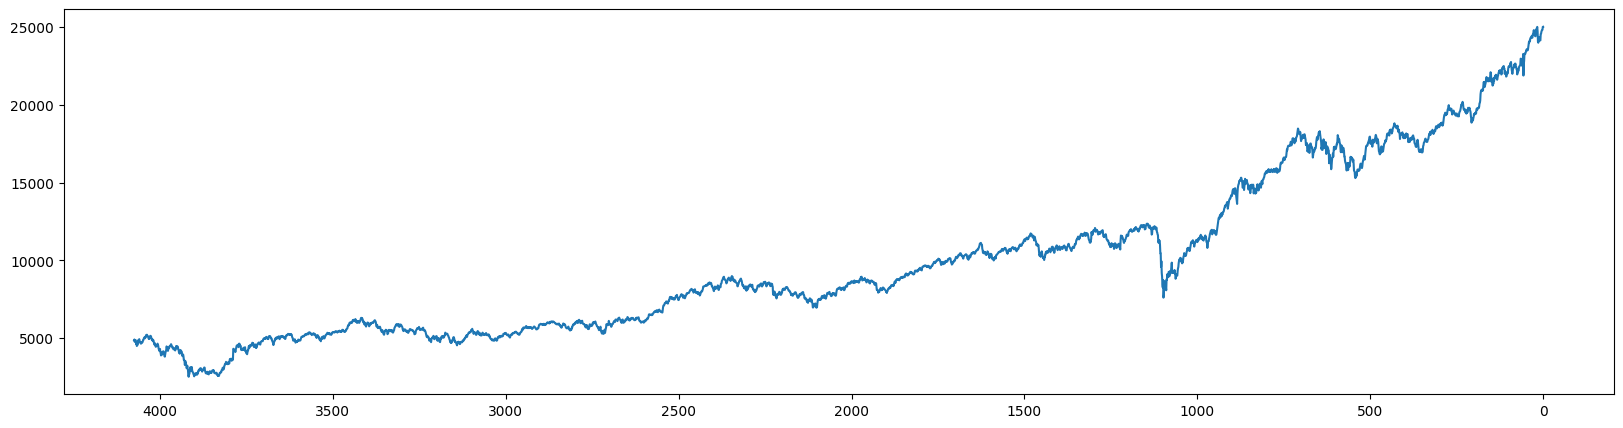

In [43]:
niftyvix['nclose'].plot(figsize=(20,5)).invert_xaxis()


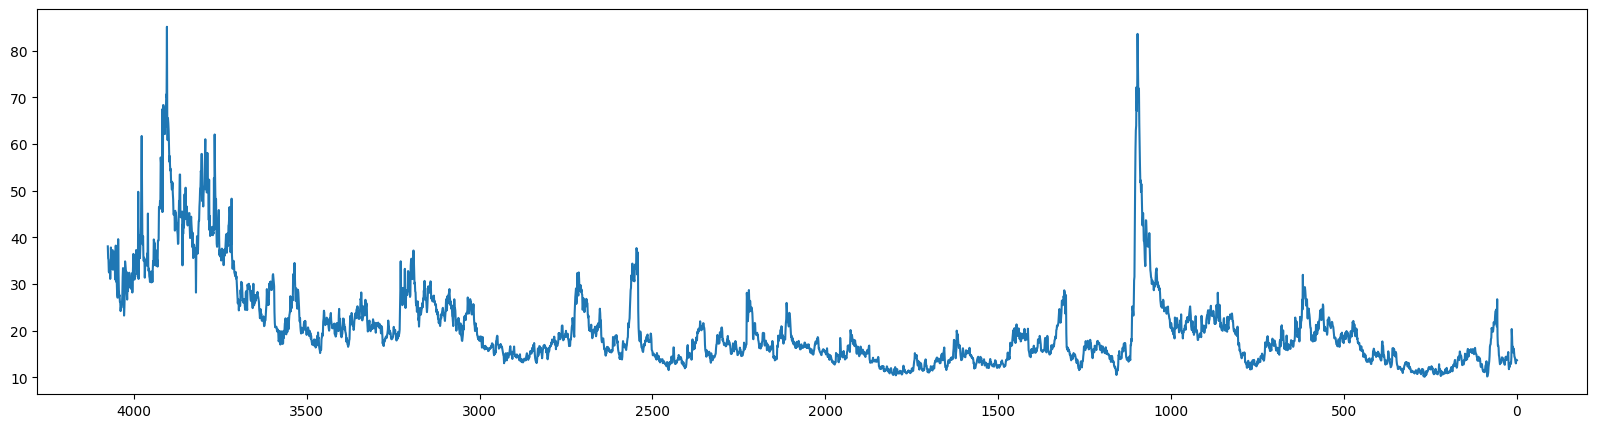

In [44]:
niftyvix['vclose'].plot(figsize=(20,5)).invert_xaxis()

---
# Feature Engineering

- Create a shift of:
    - 2 day
    - 5 days
    - 10 days